In [2]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
#1 (a)
#параметры
l = 2
t = 100
N = 100
average_100 = np.zeros(N)
excess_100 = np.zeros(N)

#процесс
for i in range(N):
    s = 0
    while s < t:
        X = scipy.stats.expon.rvs(scale=1/l)
        s += X
    average_100[i] = X
    excess_100[i] = s-100

average_100 = np.mean(average_100)
excess_100 = np.mean(excess_100)
E = 1/l
print('матожидание:\n',E,'\n')
print('средняя длина для момента t = 100:\n',round(average_100,3),'\n')
print('эксцесс для момента t = 100:\n',round(excess_100,3),'\n')

матожидание:
 0.5 

средняя длина для момента t = 100:
 0.992 

эксцесс для момента t = 100:
 0.472 



In [3]:
#2
#параметры
l = 3
a = -5
b = 20
process = []
f = l/(l*(b-a))

#процесс
s = a
while s < b:
    x = scipy.stats.expon.rvs(scale=1/l)
    s += x
    process.append(x)
process.pop()
process = np.cumsum(np.array(process))+a

F = scipy.stats.uniform(loc=a,scale=b-a)
T = scipy.stats.kstest(process,F.cdf).pvalue
print(process)
if T < 0.05:
    print('не равномерны')
else:
    print('равномерны')

[-4.75538556e+00 -4.74244861e+00 -4.68300442e+00 -4.53257308e+00
 -4.16072146e+00 -3.81986440e+00 -3.74780236e+00 -3.65182600e+00
 -3.50176519e+00 -2.57711589e+00 -2.51720372e+00 -2.01842894e+00
 -1.65964550e+00 -1.46386062e+00 -1.26450352e+00 -9.99453595e-01
 -7.82635610e-01 -3.89681309e-01 -6.26153976e-03  4.44726448e-01
  6.38495381e-01  1.05121867e+00  1.18352736e+00  1.39959367e+00
  1.90183090e+00  2.41280732e+00  2.47849089e+00  2.55170583e+00
  2.96650939e+00  4.56356880e+00  4.56550851e+00  5.51021915e+00
  5.55367318e+00  5.63163346e+00  5.72733263e+00  6.37026741e+00
  6.67180315e+00  6.80300513e+00  7.07963593e+00  7.13104824e+00
  7.35528234e+00  7.50548455e+00  8.85130728e+00  8.97512622e+00
  8.99197314e+00  9.54743530e+00  9.60202069e+00  9.69972372e+00
  9.74415921e+00  9.77925280e+00  9.95700324e+00  1.01234879e+01
  1.09407833e+01  1.10641119e+01  1.18012703e+01  1.18644255e+01
  1.21471791e+01  1.23711061e+01  1.25880454e+01  1.26352567e+01
  1.28913810e+01  1.35057

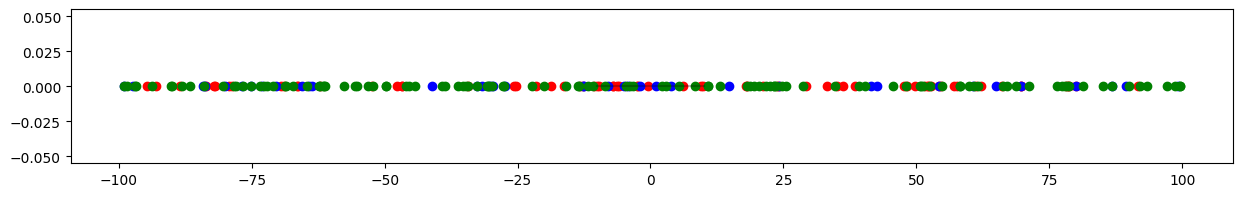

Поток цвета 0 пуассоновский: True
Поток цвета 1 пуассоновский: True
Поток цвета 2 пуассоновский: True


In [11]:
#3 (a)
#параметры
l = 1
a = -100
b = 100
poiss = []
p = [1/3,1/6,1/2]

#процесс
s = a
while s < b:
    x = scipy.stats.expon.rvs(scale=1/l)
    s += x
    poiss.append(x)
poiss.pop()
poiss = np.cumsum(poiss)+a
poiss_color = [[],[],[]]
for i in range(len(poiss)):
    color = scipy.stats.multinomial.rvs(n=1,p=p)
    color = np.where(color == 1)[0][0]
    poiss_color[color].append(poiss[i])

#визуализация
fig,ax = plt.subplots(1,1,figsize=(15,2))
ax.scatter(poiss_color[0],np.zeros(len(poiss_color[0])),color='red')
ax.scatter(poiss_color[1],np.zeros(len(poiss_color[1])),color='blue')
ax.scatter(poiss_color[2],np.zeros(len(poiss_color[2])),color='green')
ax.plot([-10,10],[0,0],color='black',alpha=0.25)
plt.show()

#проверка на экспоненциальность
def exp_test(x,l):
    global a,b
    y = np.zeros(len(x))
    y[0] = x[0]-a
    for i in range(1,len(x)):
        y[i] = x[i]-x[i-1]
    F = scipy.stats.expon(scale=1/l)
    T = scipy.stats.kstest(y,F.cdf).pvalue
    if T > 0.05:
        return True
    else:
        return T

print('Поток цвета 0 пуассоновский:',exp_test(poiss_color[0],p[0]*l))
print('Поток цвета 1 пуассоновский:',exp_test(poiss_color[1],p[1]*l))
print('Поток цвета 2 пуассоновский:',exp_test(poiss_color[2],p[2]*l))

In [13]:
#3 (b)
#доп.параметры
n = 50
intervals = np.linspace(a,b,n+1)
counts = np.zeros((n,3))

#считаем попадание в интервалы
for i in range(n):
    c_0 = np.sum((np.array(poiss_color[0]) >= intervals[i])*(np.array(poiss_color[0]) < intervals[i+1]))
    c_1 = np.sum((np.array(poiss_color[1]) >= intervals[i])*(np.array(poiss_color[1]) < intervals[i+1]))
    c_2 = np.sum((np.array(poiss_color[2]) >= intervals[i])*(np.array(poiss_color[2]) < intervals[i+1]))
    counts[i][0] = c_0
    counts[i][1] = c_1
    counts[i][2] = c_2

#проверка независимости
counts = np.array(counts).T
max_0 = int(np.max(counts[0]))
max_1 = int(np.max(counts[1]))
max_2 = int(np.max(counts[2]))
nu = np.zeros((max_0,max_1,max_2))
for i in range(max_0):
    for j in range(max_1):
        for k in range(max_2):
            nu[i][j][k] = np.sum((counts[0] == i)&(counts[1] == j)&(counts[2] == k))
T = 0
for i in range(max_0):
    for j in range(max_1):
        for k in range(max_2):
            T += ((nu[i][j][k] - (np.sum(np.sum(nu,axis=1),axis=1)[i]*np.sum(np.sum(nu,axis=0),axis=1)[j]*np.sum(np.sum(nu,axis=0),axis=0)[k]/n**2))**2)/(np.sum(np.sum(nu,axis=1),axis=1)[i]*np.sum(np.sum(nu,axis=0),axis=1)[j]*np.sum(np.sum(nu,axis=0),axis=0)[k]/n**2)
df = max_0*max_1*max_2 -(max_0+max_1+max_2)+2
q = scipy.stats.chi2.ppf(1-0.05,df=df)
if T < q:
    print('Потоки разных цветов независимы')
else:
    print('Потоки разных цветов зависимы')

Потоки разных цветов независимы


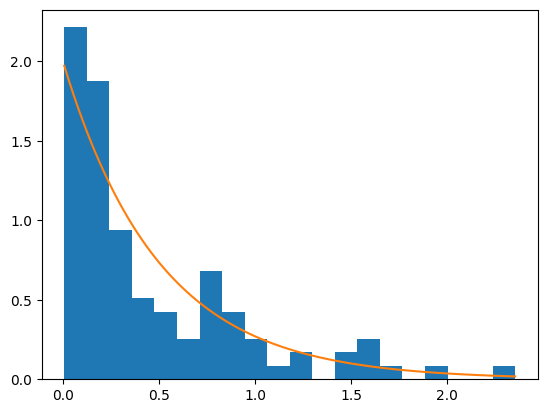

In [104]:
#4 (a)
l = 2
t = 1000
N = 100
excess = np.zeros(N)

#процесс
for i in range(N):
    s = 0
    while s < t:
        X = scipy.stats.expon.rvs(scale=1/l)
        s += X
    excess[i] = s-t

plt.hist(excess,bins=20,density=True)
a = np.min(excess)
b = np.max(excess)
x = np.linspace(a,b,100)
plt.plot(x,scipy.stats.expon.pdf(x,scale=1/l))
plt.show()

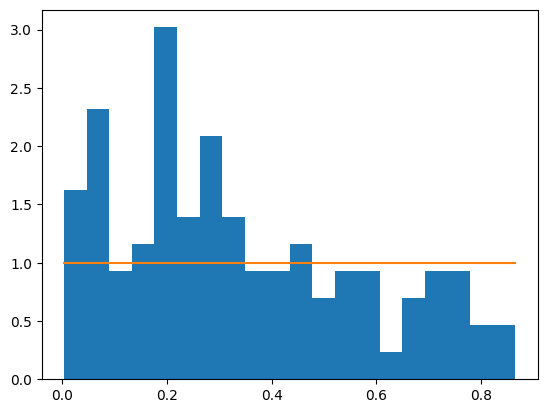

In [105]:
#4 (b)
t = 1000
N = 100
excess = np.zeros(N)

#процесс
for i in range(N):
    s = 0
    while s < t:
        X = scipy.stats.uniform.rvs()
        s += X
    excess[i] = s-t

plt.hist(excess,bins=20,density=True)
a = np.min(excess)
b = np.max(excess)
x = np.linspace(a,b,100)
plt.plot(x,scipy.stats.uniform.pdf(x))
plt.show()